paste the kaggle json file in the directory then try to create a directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:17<00:00, 242MB/s]
100% 2.29G/2.29G [00:17<00:00, 141MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
# commands used to unzip the file

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [ ]:
#  using generators so that data is loaded in small batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
# normalizing the data
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label # this function is taking every image one by one and normalizing it .

# down here we are saving the image in the same folder

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
# creating a cnn model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
163/163 [==============================] - 45s 245ms/step - loss: 1.4127 - accuracy: 0.8884 - val_loss: 31.5747 - val_accuracy: 0.6250
Epoch 2/10
163/163 [==============================] - 42s 250ms/step - loss: 0.3820 - accuracy: 0.9162 - val_loss: 69.1589 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 41s 240ms/step - loss: 0.2612 - accuracy: 0.9245 - val_loss: 61.6339 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 42s 251ms/step - loss: 0.1874 - accuracy: 0.9392 - val_loss: 0.8139 - val_accuracy: 0.8494
Epoch 5/10
163/163 [==============================] - 42s 251ms/step - loss: 0.1742 - accuracy: 0.9475 - val_loss: 10.4077 - val_accuracy: 0.6619
Epoch 6/10
163/163 [==============================] - 42s 250ms/step - loss: 0.1570 - accuracy: 0.9431 - val_loss: 4.7705 - val_accuracy: 0.4407
Epoch 7/10
163/163 [==============================] - 41s 240ms/step - loss: 0.1617 - accuracy: 0.9367 - val_loss: 1.7366 - va

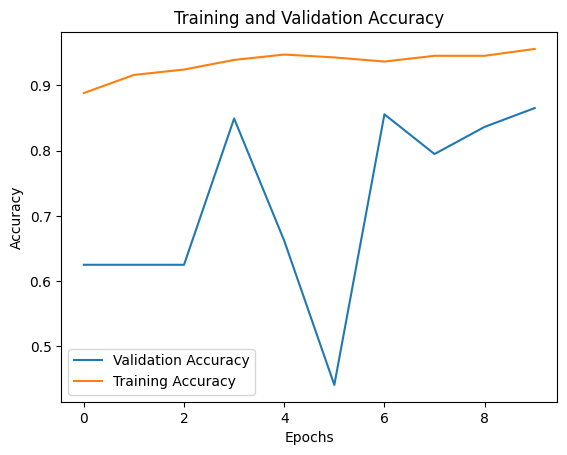

In [ ]:
plt.plot(history1.history["val_accuracy"], label='Validation Accuracy')
plt.plot(history1.history["accuracy"], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()